In [1]:
import tensorflow as tf

In [3]:
import tensorflow_datasets as tfds

tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import logging

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to C:\Users\JEANNOEL\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [6]:
class_names = metadata.features['label'].names

In [8]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print("Number of training examples: {}".format(num_train_examples))
print("Number of testing examples:  {}".format(num_test_examples))

Number of training examples: 60000
Number of testing examples:  10000


In [9]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels


train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

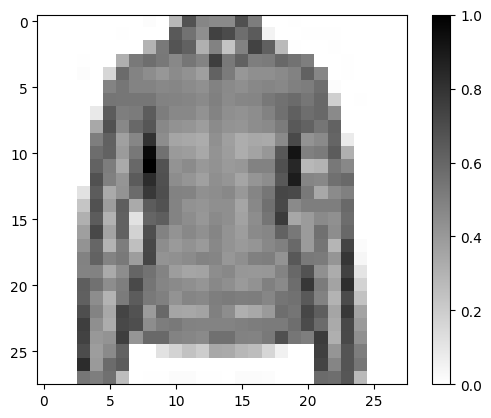

In [10]:
for image, label in test_dataset.take(1):
    break

image = image.numpy().reshape((28, 28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

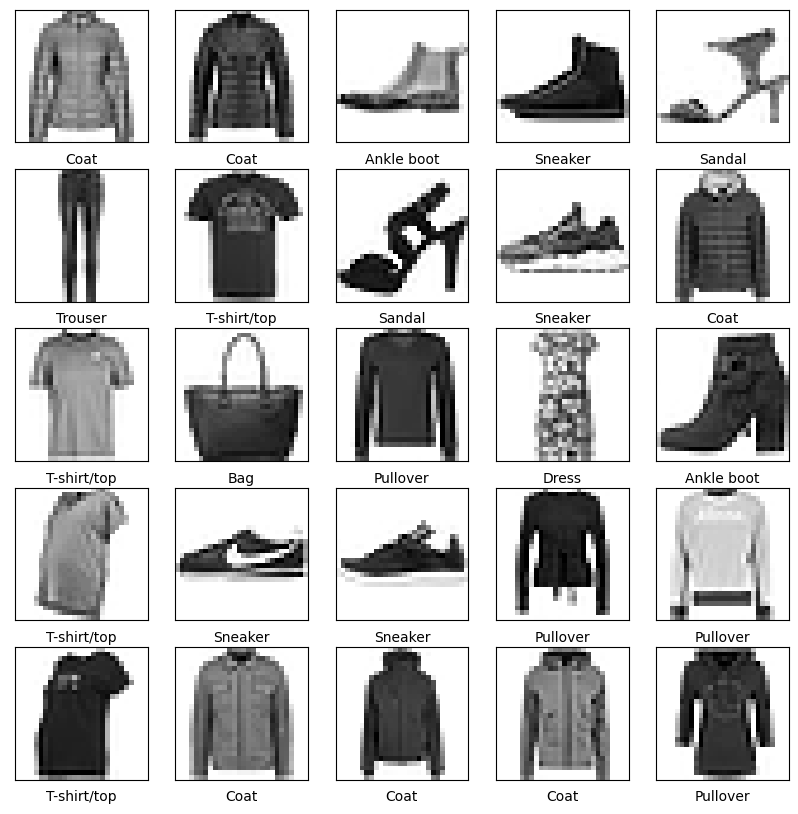

In [11]:
plt.figure(figsize=(10, 10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28, 28))
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [15]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples / BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.4050 - accuracy: 0.8563
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2582 - accuracy: 0.9067
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2153 - accuracy: 0.9186
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1784 - accuracy: 0.9328
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1547 - accuracy: 0.9432
Epoch 6/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1271 - accuracy: 0.9531
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1057 - accuracy: 0.9608
Epoch 8/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0875 - accuracy: 0.9674
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0737 - accuracy: 0.9725
Epoch 10/10
1875/1875 [==============================] - 26s 14m

In [16]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples / 32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.3175 - accuracy: 0.9196
Accuracy on test dataset: 0.9196000099182129


In [18]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

1/1 [==============================] - 0s 15ms/step


In [20]:
predictions.shape


(32, 10)

In [21]:
predictions[0]

array([3.4118866e-10, 2.8101516e-10, 1.0791978e-02, 1.0048276e-12,
       9.8785430e-01, 4.1826950e-12, 1.3537199e-03, 1.2476762e-12,
       5.2774805e-11, 1.5947824e-09], dtype=float32)

In [22]:
np.argmax(predictions[0])

4

In [23]:
test_labels[4]

5

In [26]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[..., 0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

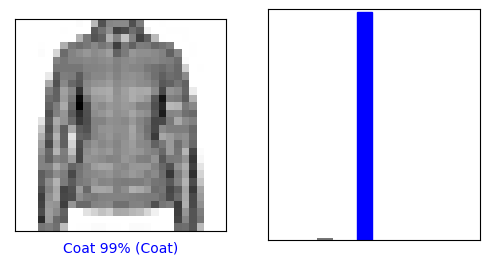

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

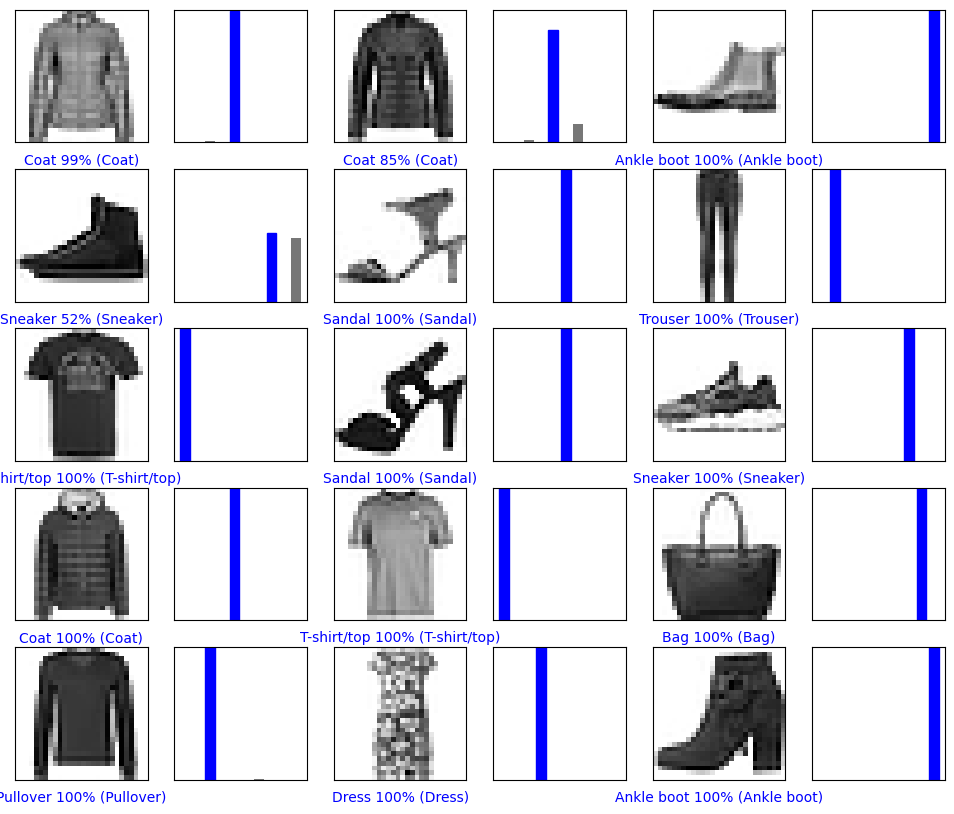

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)